### 맷플롯립 한글 깨짐 현상 처리

In [ ]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법

# 1. 먼저 폰트를 설치합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 폰트 캐시를 재구성합니다.
import matplotlib.font_manager as fm
fm.FontManager()

# 런타임 다시 시작

In [ ]:
# 3. 이제 matplotlib를 임포트합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl

# 4. 폰트를 설정합니다.
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
# 5. Retina 디스플레이를 위한 설정 (선택 사항)
%config InlineBackend.figure_format = 'retina'

# 6. 한글 폰트가 적용되었는지 확인하기 위한 예제 플롯
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [1, 4, 9])
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()


# 데이터 확인 및 선택
* 한국 드라마 top 100 분석하기https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023


## 데이터 읽어오기

In [ ]:
import pandas as pd
drama=pd.read_csv('https://raw.githubusercontent.com/cheonhae/2024_KPC_DA_02/refs/heads/master/6%E1%84%8C%E1%85%A1%E1%86%BC/top100_kdrama.csv?raw=true')
drama.head()

## 데이터 기본 정보 확인하기

In [ ]:
drama.info()

## 데이터 기초 통계량 확인하기

In [ ]:
drama.describe()

In [ ]:
drama['Rating'].describe()

In [ ]:
# 일부 컬럼만 선택
drama[['Year of release','Rating']]

## 데이터 정렬

In [ ]:
# 드라마 개봉연도(Year of release) 기준으로 오름차순 정렬
d=drama.???

In [ ]:
# 에피소드(Number of Episode) 기준으로 내림차순 정렬
d=drama.????
d.head(5)

## 데이터 빈도수

In [ ]:
# 연도별 방영작 수
count=drama['Year of release'].value_counts()
count
pd.DataFrame(count)

In [ ]:
# 평점별 개수
count=drama['Rating'].value_counts(ascending=True)
count
pd.DataFrame(count)

In [ ]:
# 방영 플랫폼별 작품 수
count=drama['Network'].value_counts()
pd.DataFrame(count)

# 데이터 선택

In [ ]:
# 드라마 이름(Name)과  평점(Rate)을 출력하시오.
drama[['Name','Rating']]
drama.loc[:,['Name','Rating']]
drama.iloc[:,[0,-1]]

In [ ]:
# 에피소드가 가장 많은 드라마 정보를 출력하시오.
d=drama['Number of Episode']==drama['Number of Episode'].max()
drama[d]

In [ ]:
# 에피소드가 가장 적은 드라마 이름을 출력하시오.
d=drama['Number of Episode']==drama['Number of Episode'].min()
drama[d]['Name']

In [ ]:
# 넷플릭스 방영드라마 검색
d=drama['Network'].????
drama[d].head(5)

In [ ]:
# 넷플릭스 또는 tvN 방영되는 드라마 검색
d=drama['Network'].????
drama[d].head()

In [ ]:

# 넷플릭스와 tvN에서 둘 다 방영되는 드라마 검색
target=['Netflix','tvN'] # 검색할 대상 플랫폼을 리스트로 저장

d=drama['Network'].map(lambda x: all(string in x for string in target))
# Network 컬럼의 각 값에 대해 lambda 함수를 적용
# lambda 함수는 x(Network 컬럼의 각 값)를 입력받아 target 리스트에 있는 모든 문자열이 x에 포함되어 있는지 확인
# all 함수는 모든 조건이 참일 때만 True를 반환
drama[d].head() # 결과 출력


In [ ]:
# 드라마 개봉 연도가 2015년 ~ 2020년인 데이터 검색
d=(drama['Year of release']>=2015) & (drama['Year of release']<=2020)
drama[d].head()

In [ ]:
drama.isnull().sum()

# 데이터 가공 및 그룹핑

In [ ]:
# 방영일(Aired Date), 에피소드 길이(Duration),줄거리(Synopsis),출연자(Cast),태그(Tags) 삭제
col=['Aired Date','Duration','Synopsis','Cast','Tags']
newdrama=drama.drop(col,axis=1)
newdrama.columns

In [ ]:
# 영문컬럼명을 아래와 같이 한글컬럼명으로 변경한다.
newdrama.columns=['이름','개봉년도','요일','에피소드수','네트워크','등급','장르','순위','평점']
newdrama.columns

In [ ]:
# 새로운 컬럼 생성
newdrama['장르개수']=newdrama['장르'].str.???
newdrama.head()

In [ ]:
# 새로운 컬럼 생성
newdrama['네트워크개수']=newdrama['네트워크'].str.count(',')+1
newdrama.head()

## 데이터 그룹핑

In [ ]:
# 개봉년도별 드라마 개수 (컬럼 기준))
d=newdrama.???
pd.DataFrame(d)

In [ ]:
# (개봉년도, 평점) 별 드라마 개수
d=newdrama.???

In [ ]:
d=newdrama.groupby('개봉년도')['평점'].mean()
pd.DataFrame(d)

# 데이터 시각화

In [ ]:
# 개봉년도별 드라마수
import numpy as np
year_Count=newdrama.groupby('개봉년도').size()
plt.figure(figsize=(16,10))
plt.plot(year_Count,color='r',marker='o')
plt.bar(year_Count.index, year_Count, color='g')
plt.xticks(np.arange(2003,2022))
plt.xlabel('Year of release')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
# 개봉년도별 평점의 평균에 대한 시각화
import matplotlib.pyplot as plt
import numpy as np

data=newdrama.groupby('개봉년도')['평점'].mean()
plt.figure(figsize=(16,10))
plt.plot(data,color='r',marker='o')
plt.xticks(np.arange(2003,2022))
plt.xlabel('개봉년도')
plt.ylabel('평점의 평균')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
top5=newdrama['개봉년도'].value_counts()
top5

### 연습 문제

In [ ]:
# (연습문제) 등급별 카운트
??

In [ ]:
# (연습문제) 개봉년도별 등급별 카운트


In [ ]:
# (연습문제) 연도별 개봉한 작품 수가 가장 많은 순서로 아래와 같이 시각화하라
???

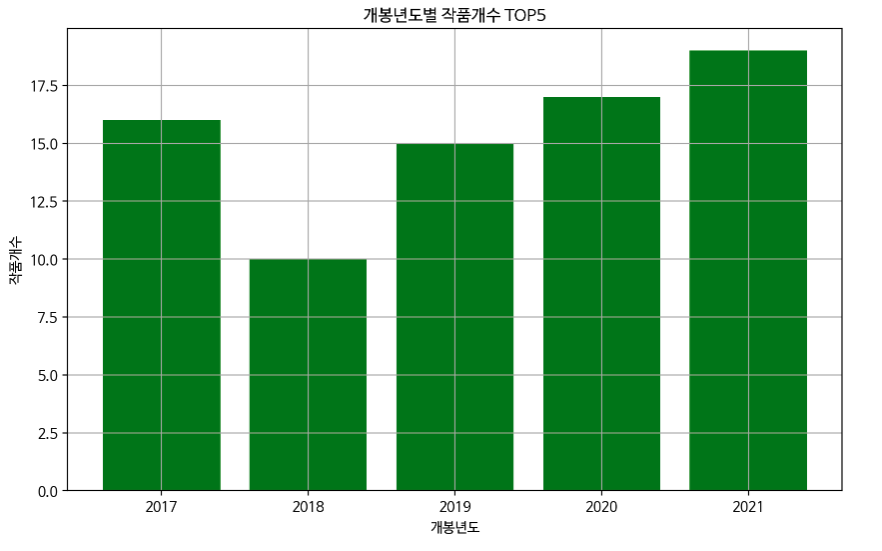

In [ ]:
# (연습문제)연도별 장르 개수의 평균을 시각화하여 아래의 그림을 출력하라 (seaborn의 barplot을 사용하라)
import seaborn as sns
???

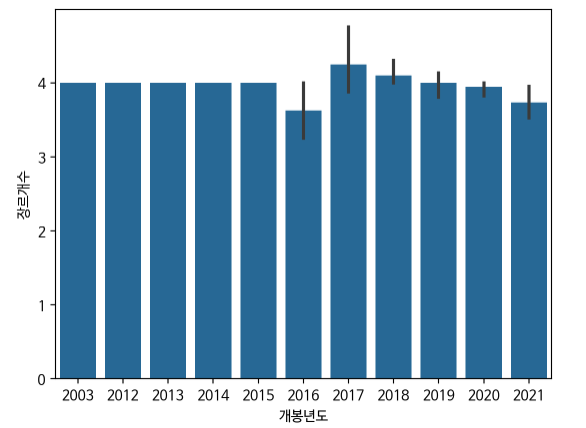

In [ ]:
# (연습문제) 네트워크별 개수를 시각화하여 아래의 그림을 출력하라
??

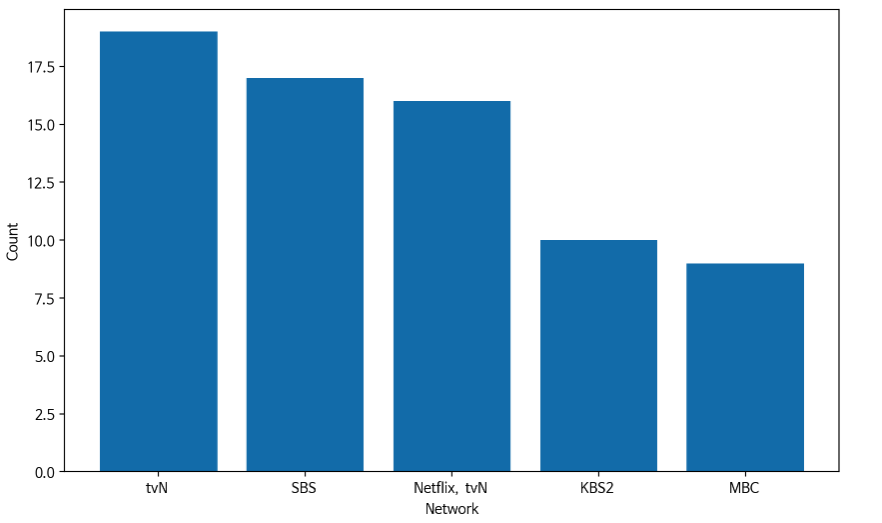

### [참고] 장르별 작품 수 시각화

In [ ]:
from collections import Counter
newdrama['장르'] = newdrama['장르'].str.strip()
genre_list = list()
for genres in newdrama['장르'].to_list():
    genres = genres.split(",  ")
    for gen in genres:
        genre_list.append(gen)
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_df.sort_values('Count',ascending = False, inplace = True)
genre_df.head()

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(genre_df,color='r',marker='o')
plt.bar(genre_df.index,genre_df.Count)
plt.title('장르별 드라마 개수')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()